# Result:
## Max Accuracy of 85.15% achieved within 100 epochs (epoch no. 49) which is higher than the accuracy achieved on the raw code given (ie, 83.48%)

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels)) #np.unique returns the unique values in the array in a sorted order ie, np.unique[1,1,2,2,2,3]=[1,2,3]

170500096/170498071 [==============================] - 2s 0us/step


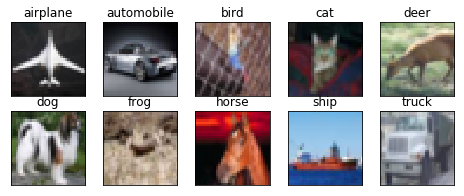

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
for i in range(50000):
 mean=np.mean(train_features[i], axis=0)
 sd=np.std(train_features[i])
 train_features[i]= (train_features[i]-mean)/sd

In [0]:
for i in range(10000):
 mean=np.mean(test_features[i], axis=0)
 sd=np.std(test_features[i])
 test_features[i]= (test_features[i]-mean)/sd

In [22]:
model = Sequential()
model.add(Convolution2D(16, 3, 3, input_shape=(32, 32, 3), border_mode='same')) #RF=3x3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, border_mode='same')) #RF=5x5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))

model.add(Convolution2D(64, 3, 3, border_mode='same')) #RF=7x7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Convolution2D(128, 3, 3, border_mode='same')) #RF=9x9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Convolution2D(256, 3, 3, border_mode='same')) #RF=11x11
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))



model.add(Convolution2D(32, 1, 1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #RF=22x22



model.add(Convolution2D(64, 3, 3, border_mode='same')) #RF=24X24
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Convolution2D(128, 3, 3, border_mode='same')) #RF=26X26
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Convolution2D(128, 3, 3, border_mode='same')) #RF=28x28
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Convolution2D(256, 3, 3, border_mode='same')) #RF=30x30
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Convolution2D(10, 1, 1, border_mode='same')) #RF=32x32
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Con

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_36 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
activation_44 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
batch_normalization_37 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_45 (Activation)   (None, 32, 32, 32)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 57s 147ms/step - loss: 1.3902 - acc: 0.5016 - val_loss: 1.4078 - val_acc: 0.5229
Epoch 2/50
390/390 [==============================] - 54s 137ms/step - loss: 1.0032 - acc: 0.6430 - val_loss: 1.1845 - val_acc: 0.6031
Epoch 3/50
390/390 [==============================] - 54s 137ms/step - loss: 0.8283 - acc: 0.7103 - val_loss: 1.0708 - val_acc: 0.6517
Epoch 4/50
390/390 [==============================] - 54s 138ms/step - loss: 0.7275 - acc: 0.7471 - val_loss: 1.0658 - val_acc: 0.6662
Epoch 5/50
390/390 [==============================] - 54s 138ms/step - loss: 0.6614 - acc: 0.7715 - val_loss: 0.8557 - val_acc: 0.7198
Epoch 6/50
390/390 [==============================] - 54s 138ms/step - loss: 0.6048 - acc: 0.7905 - val_loss: 0.8099 - val_acc: 0.7323
Epoch 7/50
390/390 [==============================] - 54s 138ms/step - loss: 0.5630 - acc: 0.8064 - val_loss: 0.7619 - val_acc: 0.7512
Epoch 8/50
390/390 [==============================] - 5

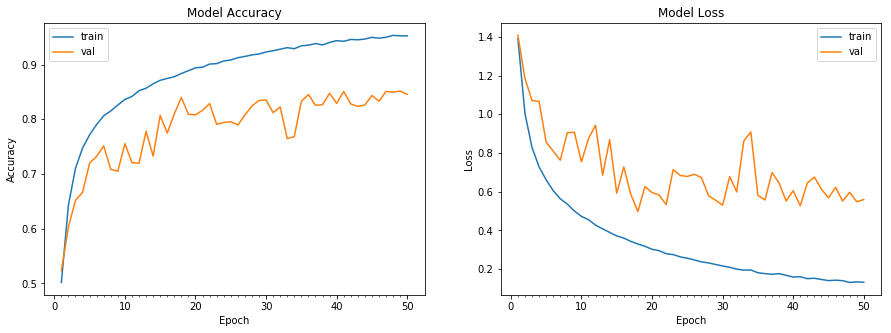

Accuracy on test data is: 84.55


In [24]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Result:
## Max Accuracy of 85.15% achieved within 100 epochs (epoch no. 49) which is higher than the accuracy achieved on the raw code given (ie, 83.48%)